In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Project
!ls

/content/drive/My Drive/Project
happytest1.jpg	landscape.jpg  output  Sad.jpg	sunflvr.jpg  test  train


In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
dataset_folder='./train'
sub_folders=os.listdir(dataset_folder)

sub_folders

['happy', 'disgust', 'angry', 'neutral', 'surprise', 'sad', 'fear']

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case. We are using positive:0, negative:1, neutral:2
  # for our use case of predicting emotions of visitors entering a retail store
  if  label in [0, 4]:    # label in ['happy', 'surprise']
    new_label=0           # changed to label = positive emotion
  elif label in [1,2,5,6]:      # label in ['disgust','angry','sad','fear']
    new_label=1           # changed to label = negative emotion
  else:                   # label in ['neutral']
    new_label=2           # changed to label = neutral emotion


  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

Streaming output truncated to the last 5000 lines.
./train/sad/Training_42398856.jpg	1
./train/sad/Training_42571056.jpg	1
./train/sad/Training_42389787.jpg	1
./train/sad/Training_43477984.jpg	1
./train/sad/Training_43072545.jpg	1
./train/sad/Training_43419369.jpg	1
./train/sad/Training_43350603.jpg	1
./train/sad/Training_43319160.jpg	1
./train/sad/Training_43312505.jpg	1
./train/sad/Training_43014753.jpg	1
./train/sad/Training_43250438.jpg	1
./train/sad/Training_43171223.jpg	1
./train/sad/Training_43088713.jpg	1
./train/sad/Training_43133945.jpg	1
./train/sad/Training_43234355.jpg	1
./train/sad/Training_43183239.jpg	1
./train/sad/Training_43427583.jpg	1
./train/sad/Training_43182021.jpg	1
./train/sad/Training_4304065.jpg	1
./train/sad/Training_43245342.jpg	1
./train/sad/Training_43024628.jpg	1
./train/sad/Training_43272995.jpg	1
./train/sad/Training_43433693.jpg	1
./train/sad/Training_43190408.jpg	1
./train/sad/Training_43049583.jpg	1
./train/sad/Training_43130188.jpg	1
./train/sad/Tr

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [ ]:
images_x.shape

(28749, 48, 48)

In [ ]:
# encoding the labels
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [ ]:
print(len(X_train))
print(len(X_test))

21561
7188


# CNN architecture

In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input) #Conv2D to capture edges and textures, l2 to prevent overfitting
conv1 = Dropout(0.1)(conv1) #to reduce overfitting
conv1 = Activation('relu')(conv1) #non-linearity
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4) #3d to 1d for dense layer

dense_1 = Dense(128,activation='relu')(flatten) #fully connected layer

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1) #sigmoid because of overlapping labels and output between 0 & 1

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 683,267 (2.61 MB)

 Trainable params: 683,267 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [ ]:
# Set the filepath with the new .keras extension
file_path = './output/emotion_model.keras'

# Define ModelCheckpoint callback with the updated file path
checkpointer = ModelCheckpoint(
    file_path,
    monitor='loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)
callback_list = [checkpointer]

# Compile and summarize the model as before
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 683,267 (2.61 MB)

 Trainable params: 683,267 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=65,callbacks=[callback_list])

Epoch 1/65
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5047 - loss: 0.9944
Epoch 1: loss improved from 1.05210 to 0.97460, saving model to ./output/emotion_model.keras
674/674 ━━━━━━━━━━━━━━━━━━━━ 203s 301ms/step - accuracy: 0.5048 - loss: 0.9944 - val_accuracy: 0.5497 - val_loss: 0.9658
Epoch 2/65
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5732 - loss: 0.9305
Epoch 2: loss improved from 0.97460 to 0.91106, saving model to ./output/emotion_model.keras
674/674 ━━━━━━━━━━━━━━━━━━━━ 256s 292ms/step - accuracy: 0.5732 - loss: 0.9304 - val_accuracy: 0.6176 - val_loss: 0.8816
Epoch 3/65
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.6183 - loss: 0.8654
Epoch 3: loss improved from 0.91106 to 0.86158, saving model to ./output/emotion_model.keras
674/674 ━━━━━━━━━━━━━━━━━━━━ 201s 298ms/step - accuracy: 0.6183 - loss: 0.8654 - val_accuracy: 0.6405 - val_loss: 0.8495
Epoch 4/65
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6467 - loss: 0.8173
Epoch 

In [ ]:
model.save('saved_model/my_model.keras')

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

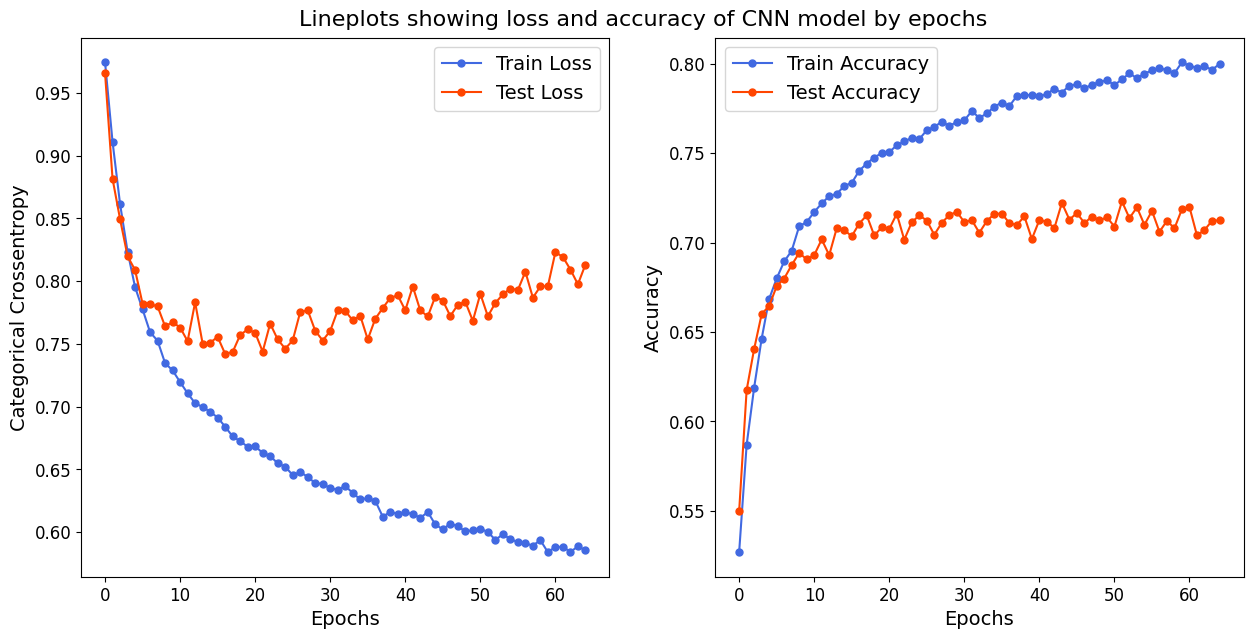

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

# Style Transfer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted Emotion: negative


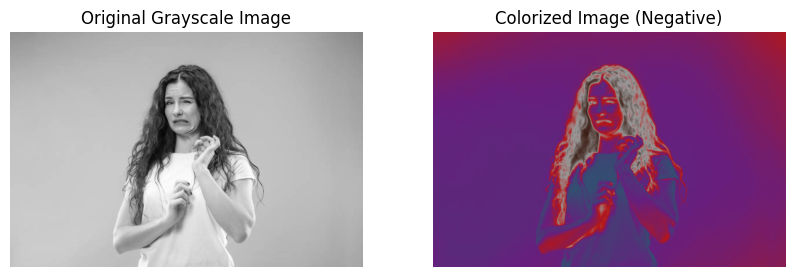

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import tensorflow as tf

# Define color palettes for different emotions
color_palettes = {
    'positive': [(172, 243, 157), (156, 255, 250), (141, 59, 114), (249, 179, 209), (255, 160, 172)],
    'negative': [(45, 11, 0), (153, 153, 153), (182, 22, 22), (103, 31, 126), (48, 82, 113)],
    'neutral':  [(198, 231, 255), (212, 246, 255), (251, 251, 251), (255, 221, 174), (255, 239, 239)]
}

# Function to load and preprocess a single image for model prediction
def load_image_for_prediction(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (48, 48))  # Resize for model compatibility
    return image, resized_image  # Return both original and resized images

# Function to create a custom colormap from a color palette
def create_custom_colormap(palette):
    palette_normalized = np.array(palette) / 255.0
    cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', palette_normalized, N=512)
    return cmap

# Function to apply the custom colormap to a grayscale image
def apply_custom_colormap(image, cmap):
    image_blur = cv2.GaussianBlur(image, (3, 3), 0)   # Smaller kernel for subtler blur
    image_normalized = image_blur / 255.0             # Normalize for colormap
    image_color = cmap(image_normalized)              # Apply colormap
    if image_color.shape[-1] == 4:                    # Remove alpha channel if present
        image_color = image_color[..., :3]
    return image_color

# Load the original and resized sample image for emotion prediction
sample_image_path = '/content/drive/MyDrive/Project/disgust2.jpg'
original_image, resized_image = load_image_for_prediction(sample_image_path)

# Load the pre-trained model and predict emotion
file_path = '/content/drive/MyDrive/Project/output/emotion_model.keras'
model = tf.keras.models.load_model(file_path)

# Function to predict emotion from the image
def predict_emotion(image):
    processed_image = np.expand_dims(image, axis=(0, -1))  # Shape: (1, 48, 48, 1) adding batch dimension and channel dimension
    prediction = model.predict(processed_image)
    emotion_label = np.argmax(prediction) #eg prediction - [0.1, 0.7, 0.2]
    emotion = ['positive', 'negative', 'neutral'][emotion_label]
    return emotion

# Get the predicted emotion using the resized image
predicted_emotion = predict_emotion(resized_image)
print(f"Predicted Emotion: {predicted_emotion}")

# Use the original image for higher-quality style transfer display
cmap = create_custom_colormap(color_palettes[predicted_emotion])
colorized_image = apply_custom_colormap(original_image, cmap)

# Display the original grayscale and colorized images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(colorized_image)
ax[1].set_title(f'Colorized Image ({predicted_emotion.capitalize()})')
ax[1].axis('off')

plt.show()